# California Groundwater Levels Over Time
Author: Tyler Yamori-Little


## Importance of Groundwater

It is widely known that California is a drought-prone state and this brings concerns regarding the available water supply. Residents of California have long regarded water as an indefinite resource that is free. However, this understanding of water is called into question today. Currently, California's residential, commercial, and industrial use of water is changing. At the same time, precipitation is scarce and is not a reliable way to restore the water table that has been built over longer geologic time. The following data sets obtained from the California open data portal[1] are used to determine how groundwater levels change over time and determine the areas in Califoria that has had the most groudwater. Furthermore, rates of chang in groundwater levels help determine which areas use the most and if new policies and public awareness of water scracity have positivly impacted the levels of use of groundwater. 

## Data methodology

The pandas data frames below are from a collection of measurements at multiple stations throughout California. The "stations" data frame gives the location in longitude and latitude of each station(well) with their ground surface elevation with respect to sea level (GSE). The difficulty of this data is that the station data frame does not include the ground water elevation (GWE) or depth to the water table (GSE_GWE). All measurements are taken in feet. Since the water table is not flat or uniform under the surface, the depth to the watertable is the defining statistic for comparing changes to the water level between stations. To caclculate this statistic, subtract the ground water elevation from the ground surface elevation. The data also includes a measurment date that once filtered, allows for comparison of general water table levels between the past and present. Furthermore, specific well sites can be subsetted in order to create a plot that can be regressed to see trends in the regional water level.

In [1]:
conda install -c conda-forge cartopy

Solving environment: done

## Package Plan ##

  environment location: /Users/tyleryamori-little/opt/anaconda3

  added / updated specs:
    - cartopy


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.11.0-py38hecd8cb5_0 --> conda-forge::conda-4.11.0-py38h50d1736_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install nbconvert

Solving environment: done

## Package Plan ##

  environment location: /Users/tyleryamori-little/opt/anaconda3

  added / updated specs:
    - nbconvert


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.11.0-py38h50d173~ --> pkgs/main::conda-4.11.0-py38hecd8cb5_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
import matplotlib.dates as mdates

In [4]:
measurements = pd.read_csv('measurements.csv')
measurements.head()

,SITE_CODE,WLM_ID,MSMT_DATE,WLM_RPE,WLM_GSE,GWE,GSE_GWE,WLM_QA_DESC,WLM_DESC,WLM_ACC_DESC,WLM_ORG_NAME,COOP_ORG_NAME,MONITORING_PROGRAM,MSMT_CMT
0,320000N1140000W001,3016758,2021-08-26 20:00:00,545.92,545.92,133.92,412.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Monterey Peninsula Water Management District,Monterey Peninsula Water Management District,VOLUNTARY,NaN
1,320000N1140000W001,3016757,2021-07-29 19:00:00,545.92,545.92,135.92,410.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Monterey Peninsula Water Management District,Monterey Peninsula Water Management District,VOLUNTARY,NaN
2,320000N1140000W001,3016756,2021-06-24 18:00:00,545.92,545.92,134.92,411.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Monterey Peninsula Water Management District,Monterey Peninsula Water Management District,VOLUNTARY,NaN
3,320000N1140000W001,3016755,2021-05-27 17:00:00,545.92,545.92,134.92,411.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Monterey Peninsula Water Management District,Monterey Peninsula Water Management District,VOLUNTARY,NaN
4,320000N1140000W001,3016754,2021-04-29 16:00:00,545.92,545.92,136.92,409.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Monterey Peninsula Water Management District,Monterey Peninsula Water Management District,VOLUNTARY,NaN


In [5]:
stations = pd.read_csv('stations.csv')
stations.head()

,STN_ID,SITE_CODE,SWN,WELL_NAME,LATITUDE,LONGITUDE,GSE,GSE_METHOD,GSE_ACC,BASIN_CODE,BASIN_NAME,COUNTY_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,MONITORING_PROGRAM
0,51445,320000N1140000W001,NaN,Bay Ridge,35.5604,-121.755,545.92,USGS quad,Unknown,NaN,NaN,Monterey,NaN,Residential,Part of a nested/multi-completion well,NaN,VOLUNTARY
1,25067,325450N1171061W001,19S02W05K003S,NaN,32.5450,-117.106,17.14,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,VOLUNTARY
2,25068,325450N1171061W002,19S02W05K004S,NaN,32.5450,-117.106,17.14,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,VOLUNTARY
3,39833,325450N1171061W003,19S02W05K005S,NaN,32.5450,-117.106,17.14,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,VOLUNTARY
4,25069,325450N1171061W004,19S02W05K006S,NaN,32.5450,-117.106,17.14,Unknown,Unknown,9-033,Coastal Plain Of San Diego,San Diego,NaN,Unknown,Unknown,NaN,VOLUNTARY


### Comparing past groundwater levels to present levels

To map out the groundwater elevations across California, the "measurements" data frame can be filtered based on the date the data was obtained. By doing so, histograms will provide the number of wells at different depths to the water table in past and present times. Furthremore, by sampling the data, it becomes feasible to iterate through the sample and match the longitude and latitude of the station and its measurements. As a result, cartopy functions will provide a map view of the groundwater levels or lack of groundwater throughout California.

In [6]:
#separate and shorten the data into old and new measurements
#Also subset the data to show unique stations so that the same station does not show up more than once
measurements_new = measurements[(measurements['MSMT_DATE'] > '2020-01-01')].copy()
measurements_new.reset_index(drop=True, inplace=True)
index_new = np.unique(measurements_new["SITE_CODE"],return_index = True)[1]
measurements_new = measurements_new.iloc[index_new]
print(np.size(measurements_new))

measurements_old = measurements[(measurements['MSMT_DATE'] < '1995-01-01') & (measurements['MSMT_DATE'] > '1990-01-01')].copy()
measurements_old.reset_index(drop=True, inplace=True)
index_old = np.unique(measurements_old["SITE_CODE"],return_index = True)[1]
measurements_old = measurements_old.iloc[index_new]




#Reducing the size of these dataframes is important for the iteration in the next step

116522


In [7]:
#intialize new columns for lat and lons
measurements_new.reset_index(drop=True, inplace=True)
measurements_new["LONGITUDE"] = np.zeros(len(measurements_new))
measurements_new["LATITUDE"] = np.zeros(len(measurements_new))

#intialize new columns for lat and lons
measurements_old.reset_index(drop=True, inplace=True)
measurements_old["LONGITUDE"] = np.zeros(len(measurements_old))
measurements_old["LATITUDE"] = np.zeros(len(measurements_old))

print(np.size(measurements_old))
#the data set is still too large so it has to be sampled and bootstrapped

measurements_new_sample = measurements_new.sample(500,replace = False)
print(np.size(measurements_new_sample))
measurements_old_sample = measurements_old.sample(500,replace = False)
print(np.size(measurements_old_sample))

133168
8000
8000


These samples can be visualized as a histogram to see the distribution of depths to the general watertable. 

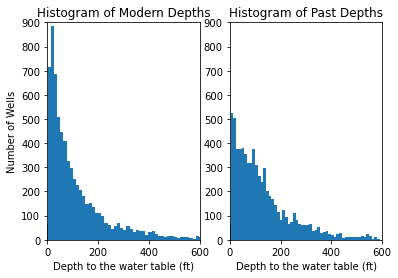

In [8]:
fig,axs = plt.subplots(1,2)
axs[0].hist(measurements_new['GSE_GWE'],bins = 100)
axs[0].set_title('Histogram of Modern Depths')
axs[0].set_xlim(0,600)
axs[0].set_ylim(0,900)
axs[0].set_ylabel('Number of Wells')
axs[1].hist(measurements_old['GSE_GWE'], bins = 100)
axs[1].set_title('Histogram of Past Depths')
axs[1].set_xlim(0,600)
axs[1].set_ylim(0,900)
for ax in axs.flat:
    ax.set(xlabel = 'Depth to the water table (ft)')
plt.show()

The histograms show that depth to the water table is a right skewed distribution. Regardless of the time the data was taken, there are more wells that have less depth to the water table. This makes sense because its more cost effective to dig more shallow wells than it is dig a very deep one. It is noticable though that there are more counts of wells at lower depths in the modern histogram. The higher depth ranges of the histogram on the other hand are actually quite similar. One would expect that the past histogram should have more counts of wells at the shallow level indicating more available, easily reachable water. This however is not the case. One possible explanation would be that California has created more wells that reach a shallow water table to make up for water loss in different regions. This hypothesis can be examined further by looking at the location of modern versus past wells.

In [9]:
#intialize new columns
measurements_new_sample.reset_index(drop=True, inplace=True)
measurements_new_sample["LONGITUDE"] = np.zeros(len(measurements_new_sample))
measurements_new_sample["LATITUDE"] = np.zeros(len(measurements_new_sample))

#intialize new columns
measurements_old_sample.reset_index(drop=True, inplace=True)
measurements_old_sample["LONGITUDE"] = np.zeros(len(measurements_old_sample))
measurements_old_sample["LATITUDE"] = np.zeros(len(measurements_old_sample))

##add location for each measurement
for i in range(0,len(measurements_new_sample)):
    for j in range(0,len(stations)):
        if (measurements_new_sample['SITE_CODE'][i] == stations['SITE_CODE'][j]):
            measurements_new_sample.at[i,"LONGITUDE"] = stations['LONGITUDE'][j]
            measurements_new_sample.at[i,"LATITUDE"] = stations['LATITUDE'][j]
            break
            
##add location for each measurement
for i in range(0,len(measurements_old_sample)):
    for j in range(0,len(stations)):
        if (measurements_old_sample['SITE_CODE'][i] == stations['SITE_CODE'][j]):
            measurements_old_sample.at[i,"LONGITUDE"] = stations['LONGITUDE'][j]
            measurements_old_sample.at[i,"LATITUDE"] = stations['LATITUDE'][j]
            break

In [10]:
measurements_new_sample

,SITE_CODE,WLM_ID,MSMT_DATE,WLM_RPE,WLM_GSE,GWE,GSE_GWE,WLM_QA_DESC,WLM_DESC,WLM_ACC_DESC,WLM_ORG_NAME,COOP_ORG_NAME,MONITORING_PROGRAM,MSMT_CMT,LONGITUDE,LATITUDE
0,338158N1171434W001,2862902,2021-03-23 00:00:00,1446.52,1445.22,1289.72,155.50,NaN,Electric sounder measurement,Water level accuracy to nearest tenth of a foot,Eastern Municipal Water District,Eastern Municipal Water District,SGMA,NaN,-117.143,33.8158
1,344075N1187740W001,3039659,2021-10-11 00:00:00,679.16,678.72,NaN,NaN,Temporarily inaccessible,NaN,NaN,"County of Ventura, Watershed Protection District","County of Ventura, Watershed Protection District",CASGEM,locked - no key,-118.773,34.4077
2,372173N1210767W001,2538490,2020-03-10 00:00:00,201.67,201.00,116.66,84.34,NaN,Steel tape measurement,Water level accuracy to nearest tenth of a foot,San Luis & Delta-Mendota Water Authority,San Luis & Delta-Mendota Water Authority,VOLUNTARY,NaN,-121.077,37.2173
3,385029N1217368W001,3031160,2021-10-19 00:00:00,48.50,47.50,-21.90,69.40,Oil or foreign substance in casing,Steel tape measurement,Water level accuracy to nearest tenth of a foot,Bureau of Reclamation,Bureau of Reclamation,VOLUNTARY,Black oil.,-121.738,38.5035
4,377548N1210219W001,3020007,2021-10-11 00:00:00,92.90,91.40,54.40,37.00,NaN,Electric sounder measurement,Water level accuracy to nearest tenth of a foot,Department of Water Resources,Department of Water Resources,VOLUNTARY,Run 22,-121.022,37.7548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,373368N1218695W003,2871571,2021-06-03 09:53:00,88.07,86.94,28.87,58.07,NaN,Electric sounder measurement,Water level accuracy to nearest tenth of a foot,Santa Clara Valley Water District,Santa Clara Valley Water District,CASGEM,NaN,-121.870,37.3368
496,398107N1201653W001,3022914,2021-10-20 12:00:00,4967.39,4966.79,4953.79,13.00,NaN,Steel tape measurement,Water level accuracy to nearest tenth of a foot,Department of Water Resources,Department of Water Resources,VOLUNTARY,NaN,-120.165,39.8107
497,398170N1203478W001,3022910,2021-10-19 12:00:00,4891.58,4890.48,4842.50,47.98,NaN,Electric sounder measurement,Water level accuracy to nearest tenth of a foot,Department of Water Resources,Department of Water Resources,CASGEM,NaN,-120.348,39.8170
498,338159N1169853W001,2862705,2021-04-09 00:00:00,1486.63,1486.33,1212.73,273.60,NaN,Electric sounder measurement,Water level accuracy to nearest tenth of a foot,Eastern Municipal Water District,Eastern Municipal Water District,VOLUNTARY,NaN,-116.985,33.8159


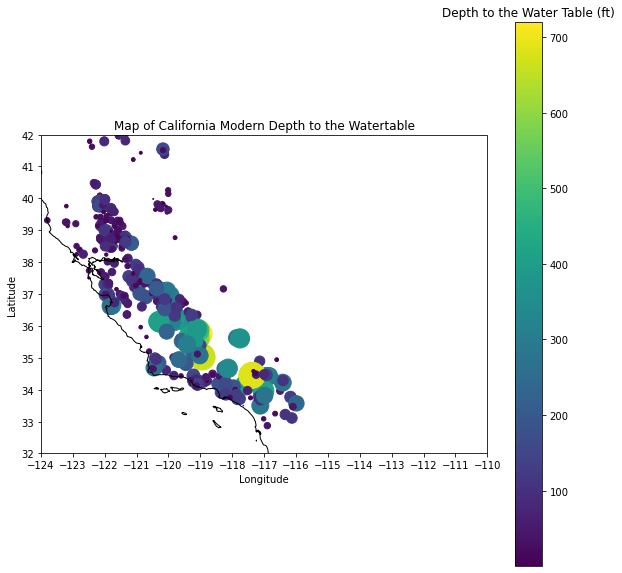

/Users/tyleryamori-little/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


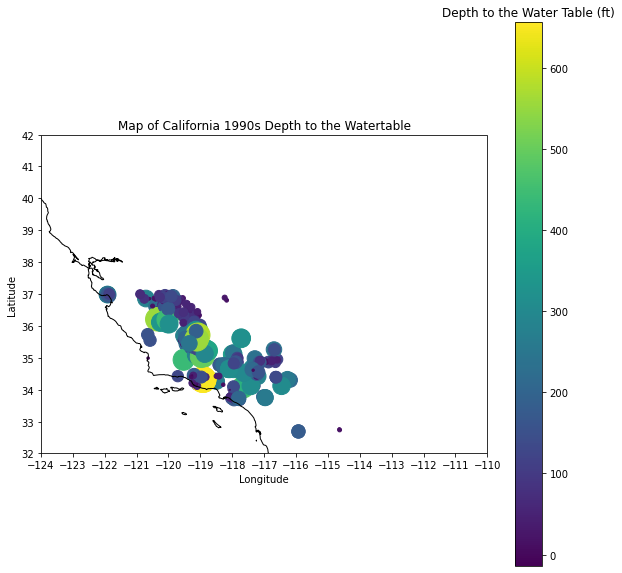

In [11]:
#A map of the water levels across California

# Set Corners of Map
lat0=32
lat1=42
lon0=-124
lon1=-110
tickstep=1 #for axes
latticks=np.arange(lat0,lat1+tickstep,tickstep)
lonticks=np.arange(lon0,lon1+tickstep,tickstep)

# make plot object with ticks, coastlines, etc.
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon0, lon1, lat0, lat1], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1)
ax.set_xticks(lonticks)
ax.set_yticks(latticks, crs=ccrs.PlateCarree())
ax.set(xlabel='Longitude', ylabel='Latitude',title='Map of California Modern Depth to the Watertable')


# Sort by water level to plot largest sources on top
plt.scatter(measurements_new_sample['LONGITUDE'], measurements_new_sample['LATITUDE'],s = measurements_new_sample['GSE_GWE'], c = measurements_new_sample['GSE_GWE'],marker='o')
clb = plt.colorbar()
clb.ax.set_title('Depth to the Water Table (ft)')
plt.show()

# make plot object with ticks, coastlines, etc.
plt.figure(2,(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon0, lon1, lat0, lat1], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1)
ax.set_xticks(lonticks)
ax.set_yticks(latticks, crs=ccrs.PlateCarree())
ax.set(xlabel='Longitude', ylabel='Latitude',title='Map of California 1990s Depth to the Watertable')


# Sort by water level to plot largest sources on top
plt.scatter(measurements_old_sample['LONGITUDE'], measurements_old_sample['LATITUDE'],s = measurements_old_sample['GSE_GWE'], c = measurements_old_sample['GSE_GWE'],marker='o')
clb = plt.colorbar()
clb.ax.set_title('Depth to the Water Table (ft)')
plt.show()

From the sampled data a couple of things can be determined. The sampled data for the past appears to not pick up wells from the bay area. Therefore, it can be inferred that the bay area did not have a need or reliance on groundwater until modern times. Thus, the creation of more wells in the Bay Area is a possible explanation for the contradiction in the data found in the previous histograms. It also looks like circle sizes got larger and the color got lighter in the Central Valley. This means that the depth to the water table increased over time for that region. For SoCal there is also larger and lighter data points in modern time. This means that SoCal also had an increase in depth to the water table. From these observations it is possible to conclude that the groundwater supply in these regions have decreased. In the next section, the depth to the water table is examined over time in the Alameda county versus depths at Los Angeles County. This would either support or contradict the claims mentioned above.

In [12]:
Alameda = stations[stations['COUNTY_NAME'] == 'Alameda'].copy()
LA = stations[stations['COUNTY_NAME'] == 'Los Angeles'].copy()
Alameda.reset_index(drop=True, inplace=True)
LA.reset_index(drop=True, inplace=True)
Alameda.head()

,STN_ID,SITE_CODE,SWN,WELL_NAME,LATITUDE,LONGITUDE,GSE,GSE_METHOD,GSE_ACC,BASIN_CODE,BASIN_NAME,COUNTY_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,MONITORING_PROGRAM
0,50325,347178N1221973W001,NaN,8D,37.7176,-122.183,14.81,Other,Unknown,2-009.04,East Bay Plain,Alameda,910.0,Observation,Single Well,NaN,CASGEM
1,47372,375259N1219869W001,05S01W05H004M,5S/1W-05H004,37.5259,-121.987,37.00,GPS,0.1 ft.,2-009.01,Niles Cone,Alameda,340.0,Observation,Single Well,529658,CASGEM
2,47373,375260N1219868W001,05S01W05H005M,5S/1W-05H005,37.5260,-121.987,37.06,GPS,0.1 ft.,2-009.01,Niles Cone,Alameda,260.0,Observation,Single Well,529657,CASGEM
3,47097,375260N1219869W001,05S01W05H006M,5S/1W-05H006,37.5260,-121.987,37.04,GPS,0.1 ft.,2-009.01,Niles Cone,Alameda,80.0,Observation,Single Well,529653,CASGEM
4,47051,375261N1219868W001,05S01W05H003M,5S/1W-05H003,37.5261,-121.987,37.06,GPS,0.1 ft.,2-009.01,Niles Cone,Alameda,490.0,Observation,Single Well,529661,CASGEM


In [13]:
##find the measurements at each site

#declare a df that contains the oldest measurements
measurements_older = measurements[(measurements['MSMT_DATE'] < '1980-01-01') & (measurements['MSMT_DATE'] > '1970-01-01')]
measurements_older.reset_index(drop=True, inplace=True)

#sample the data to make it easier for iteration
index_older = np.unique(measurements_older["SITE_CODE"],return_index = True)[1]
measurements_older = measurements_older.iloc[index_older]

#find the sites where the sitecodes match and store them
measurements_older.reset_index(drop=True, inplace=True)
SiteCodes = [0] * len(Alameda)
for i in range(0,len(measurements_older)):
    for j in range(0,len(Alameda)):
        if (measurements_older['SITE_CODE'][i] == Alameda['SITE_CODE'][j]):
            SiteCodes[j] = (measurements_older['SITE_CODE'][i])
            break

try:
    while True:
        SiteCodes.remove(0)
except ValueError:
    pass
print(SiteCodes)

['376246N1221297W001', '376452N1217829W001', '376602N1220898W001', '377241N1215675W001', '377393N1221811W001']


The above site codes correspond to wells that have had data measurements in Alameda as far back as 1970.

In [14]:
WellSite1 = measurements[measurements["SITE_CODE"] == SiteCodes[0]].copy()
WellSite1.reset_index(drop=True, inplace=True)
WellSite2 = measurements[measurements["SITE_CODE"] == SiteCodes[1]].copy()
WellSite2.reset_index(drop=True, inplace=True)
WellSite3 = measurements[measurements["SITE_CODE"] == SiteCodes[2]].copy()
WellSite3.reset_index(drop=True, inplace=True)
WellSite4 = measurements[measurements["SITE_CODE"] == SiteCodes[3]].copy()
WellSite4.reset_index(drop=True, inplace=True)
WellSite5 = measurements[measurements["SITE_CODE"] == SiteCodes[4]].copy()
WellSite5.reset_index(drop=True, inplace=True)

In [15]:
#create a new column for datetime for plotting
WellSite1['datetime'] = np.zeros(len(WellSite1))
WellSite1['year'] = np.zeros(len(WellSite1))
for i in range(0,len(WellSite1)):
    WellSite1.at[i,'datetime'] = datetime.strptime(WellSite1['MSMT_DATE'][i], '%Y-%m-%d %H:%M:%S')
    WellSite1.at[i,'year'] = WellSite1["datetime"][i].year + (WellSite1["datetime"][i].month)/12 + (WellSite1["datetime"][i].day)/30.5
    
WellSite2['datetime'] = np.zeros(len(WellSite2))
WellSite2['year'] = np.zeros(len(WellSite2))
for i in range(0,len(WellSite2)):
    WellSite2.at[i,'datetime'] = datetime.strptime(WellSite2['MSMT_DATE'][i], '%Y-%m-%d %H:%M:%S')
    WellSite2.at[i,'year'] = WellSite2["datetime"][i].year + (WellSite2["datetime"][i].month)/12 + (WellSite2["datetime"][i].day)/30.5
    
WellSite3['datetime'] = np.zeros(len(WellSite3))
WellSite3['year'] = np.zeros(len(WellSite3))
for i in range(0,len(WellSite3)):
    WellSite3.at[i,'datetime'] = datetime.strptime(WellSite3['MSMT_DATE'][i], '%Y-%m-%d %H:%M:%S')
    WellSite3.at[i,'year'] = WellSite3["datetime"][i].year + (WellSite3["datetime"][i].month)/12 + (WellSite3["datetime"][i].day)/30.5

WellSite4['datetime'] = np.zeros(len(WellSite4))
WellSite4['year'] = np.zeros(len(WellSite4))
for i in range(0,len(WellSite4)):
    WellSite4.at[i,'datetime'] = datetime.strptime(WellSite4['MSMT_DATE'][i], '%Y-%m-%d %H:%M:%S')
    WellSite4.at[i,'year'] = WellSite4["datetime"][i].year + (WellSite4["datetime"][i].month)/12 + (WellSite4["datetime"][i].day)/30.5
    
WellSite5['datetime'] = np.zeros(len(WellSite5))
WellSite5['year'] = np.zeros(len(WellSite5))
for i in range(0,len(WellSite5)):
    WellSite5.at[i,'datetime'] = datetime.strptime(WellSite5['MSMT_DATE'][i], '%Y-%m-%d %H:%M:%S')
    WellSite5.at[i,'year'] = WellSite5["datetime"][i].year + (WellSite5["datetime"][i].month)/12 + (WellSite5["datetime"][i].day)/30.5
    
WellSite1.head()

,SITE_CODE,WLM_ID,MSMT_DATE,WLM_RPE,WLM_GSE,GWE,GSE_GWE,WLM_QA_DESC,WLM_DESC,WLM_ACC_DESC,WLM_ORG_NAME,COOP_ORG_NAME,MONITORING_PROGRAM,MSMT_CMT,datetime,year
0,376246N1221297W001,1707018,2000-03-29 00:00:00,7.5,6.7,-3.35,10.05,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,2000-03-29 00:00:00,2001.200820
1,376246N1221297W001,1707017,1999-01-29 00:00:00,7.5,6.7,NaN,NaN,Temporarily inaccessible,NaN,NaN,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1999-01-29 00:00:00,2000.034153
2,376246N1221297W001,1707016,1995-04-24 00:00:00,7.5,6.7,-9.50,16.20,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1995-04-24 00:00:00,1996.120219
3,376246N1221297W001,1707015,1994-12-12 00:00:00,7.5,6.7,-10.30,17.00,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1994-12-12 00:00:00,1995.393443
4,376246N1221297W001,1707014,1994-06-20 00:00:00,7.5,6.7,-9.30,16.00,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1994-06-20 00:00:00,1995.155738


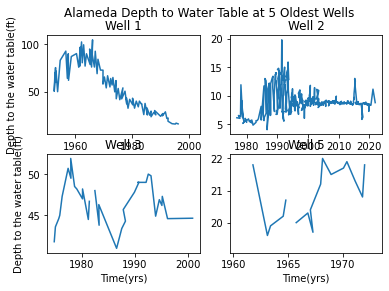

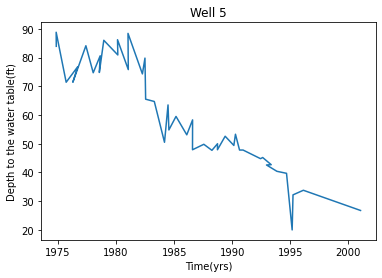

In [16]:
#plot the 5 wells
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Alameda Depth to Water Table at 5 Oldest Wells')
ax1.plot(WellSite1["year"],WellSite1["GSE_GWE"])
ax1.set_title('Well 1')
ax1.set_ylabel('Depth to the water table(ft)')
ax1.set_xlabel('Time(yrs)')
ax2.plot(WellSite2["year"],WellSite2["GSE_GWE"])
ax2.set_title('Well 2')
ax2.set_xlabel('Time(yrs)')
ax3.plot(WellSite3["year"],WellSite3["GSE_GWE"])
ax3.set_title('Well 3')
ax3.set_ylabel('Depth to the water table(ft)')
ax3.set_xlabel('Time(yrs)')
ax4.plot(WellSite4["year"],WellSite4["GSE_GWE"])
ax4.set_title('Well 5')
ax4.set_xlabel('Time(yrs)')
plt.show()

plt.plot(WellSite5["year"],WellSite5["GSE_GWE"])
plt.title('Well 5')
plt.xlabel('Time(yrs)')
plt.ylabel('Depth to the water table(ft)')
plt.show()

The above plots are interesting. It appears that wells 1 and 5 follow a similar pattern while the other wells are different. Wells 2-4, although old, all share a low depth to water table and remain in a relativly consistent small range. A possible explanation would be that those wells may not be used as much or may serve a different purpose than extracting groundwater. Therefore, it is best to use wells 1 and 5 for regression analysis to see what changes have been made over the years and what the future looks like.

In [17]:
WellSite1

,SITE_CODE,WLM_ID,MSMT_DATE,WLM_RPE,WLM_GSE,GWE,GSE_GWE,WLM_QA_DESC,WLM_DESC,WLM_ACC_DESC,WLM_ORG_NAME,COOP_ORG_NAME,MONITORING_PROGRAM,MSMT_CMT,datetime,year
0,376246N1221297W001,1707018,2000-03-29 00:00:00,7.5,6.7,-3.35,10.05,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,2000-03-29 00:00:00,2001.200820
1,376246N1221297W001,1707017,1999-01-29 00:00:00,7.5,6.7,NaN,NaN,Temporarily inaccessible,NaN,NaN,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1999-01-29 00:00:00,2000.034153
2,376246N1221297W001,1707016,1995-04-24 00:00:00,7.5,6.7,-9.50,16.20,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1995-04-24 00:00:00,1996.120219
3,376246N1221297W001,1707015,1994-12-12 00:00:00,7.5,6.7,-10.30,17.00,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1994-12-12 00:00:00,1995.393443
4,376246N1221297W001,1707014,1994-06-20 00:00:00,7.5,6.7,-9.30,16.00,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1994-06-20 00:00:00,1995.155738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,376246N1221297W001,1706939,1952-08-06 00:00:00,7.5,6.7,-62.40,69.10,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1952-08-06 00:00:00,1952.863388
80,376246N1221297W001,1706938,1952-05-08 00:00:00,7.5,6.7,-48.60,55.30,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1952-05-08 00:00:00,1952.678962
81,376246N1221297W001,1706937,1952-04-09 00:00:00,7.5,6.7,-43.90,50.60,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1952-04-09 00:00:00,1952.628415
82,376246N1221297W001,1706936,1952-02-28 00:00:00,7.5,6.7,-68.90,75.60,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1952-02-28 00:00:00,1953.084699


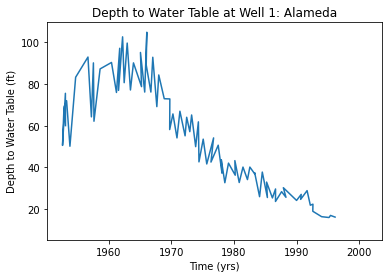

In [18]:
WellSite1.reset_index(drop=True, inplace=True)
plt.plot(WellSite1["year"],WellSite1["GSE_GWE"])
plt.title("Depth to Water Table at Well 1: Alameda")
plt.xlabel("Time (yrs)")
plt.ylabel("Depth to Water Table (ft)")
plt.show()

Now the data can be examined through the average rate of change and regressed using scripy and polyfit. 

In [19]:
WellSite1['change_rate'] = np.zeros(len(WellSite1))

for i in range(0,len(WellSite1)-1):
    GSE_GWE_difference = WellSite1['GSE_GWE'][i+1] - WellSite1['GSE_GWE'][i]
    time_difference = WellSite1['year'][i+1] - WellSite1['year'][i]
    WellSite1.at[i,'change_rate'] = GSE_GWE_difference/time_difference
WellSite1.head()

avgChange = np.mean(WellSite1['change_rate'])
print("The average change rate of the depth to water table is ", avgChange, "ft/year")

The average change rate of the depth to water table is  6.403380168360674 ft/year


LinregressResult(slope=-1.6613000963238038, intercept=3333.4137949931633, rvalue=-0.8404651417023603, pvalue=2.916805410175413e-23, stderr=0.11900835951850519)


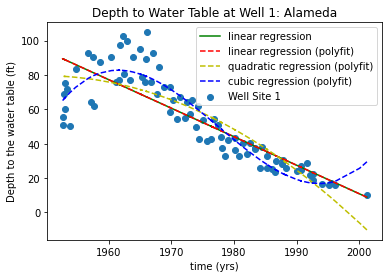

In [20]:
#first the NaN values have to be removed
Y = WellSite1['GSE_GWE']
X = WellSite1['year']
finiteYmask = np.isfinite(Y)
Yclean = Y[finiteYmask]
Xclean = X[finiteYmask]


values = stats.linregress(Xclean,Yclean)
print(values)

linear = np.polyfit(Xclean, Yclean, deg = 1)
quadratic = np.polyfit(Xclean, Yclean, deg = 2)
cubic = np.polyfit(Xclean, Yclean, deg = 3)

plt.scatter(WellSite1['year'],WellSite1['GSE_GWE'], label='Well Site 1')

plt.ylabel('Depth to the water table (ft)')
plt.xlabel('time (yrs)')
plt.title('Depth to Water Table at Well 1: Alameda')
plt.plot(WellSite1['year'],values[0] * WellSite1['year'] + values[1],
         'g', label = "linear regression")
plt.plot(WellSite1['year'],linear[0] * WellSite1['year'] + linear[1],
         'r--', label = "linear regression (polyfit)")
plt.plot(WellSite1['year'],quadratic[0] * WellSite1['year']**2 + quadratic[1] * WellSite1['year'] + quadratic[2],
         'y--', label = "quadratic regression (polyfit)")
plt.plot(WellSite1['year'],cubic[0] * WellSite1['year']**3 + cubic[1] * WellSite1['year']**2 + cubic[2] * WellSite1['year'] + cubic[3],
         'b--', label = "cubic regression (polyfit)")
plt.legend()
plt.show()

For well 1, a cubic regression proved to be the most accurate in fitting the data. Although it seems that there is a downtrend currently, the cubic regression says otherwise. In order to confirm or deny this data, it is best to look at another well.

In [21]:
WellSite5

,SITE_CODE,WLM_ID,MSMT_DATE,WLM_RPE,WLM_GSE,GWE,GSE_GWE,WLM_QA_DESC,WLM_DESC,WLM_ACC_DESC,WLM_ORG_NAME,COOP_ORG_NAME,MONITORING_PROGRAM,MSMT_CMT,datetime,year
0,377393N1221811W001,1706523,2000-05-19 00:00:00,24.91,24.71,-2.06,26.77,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,2000-05-19 00:00:00,2001.039617
1,377393N1221811W001,1706522,1995-04-24 00:00:00,24.91,24.71,-9.09,33.80,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1995-04-24 00:00:00,1996.120219
2,377393N1221811W001,1706521,1994-12-07 00:00:00,24.91,24.71,-7.49,32.20,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1994-12-07 00:00:00,1995.229508
3,377393N1221811W001,1706520,1994-06-20 00:00:00,24.91,24.71,4.71,20.00,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1994-06-20 00:00:00,1995.155738
4,377393N1221811W001,1706519,1993-11-23 00:00:00,24.91,24.71,-14.99,39.70,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1993-11-23 00:00:00,1994.670765
5,377393N1221811W001,1706518,1993-05-13 00:00:00,24.91,24.71,-15.69,40.40,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1993-05-13 00:00:00,1993.842896
6,377393N1221811W001,1706517,1992-11-01 00:00:00,24.91,24.71,-17.89,42.60,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1992-11-01 00:00:00,1992.949454
7,377393N1221811W001,1706516,1992-06-26 00:00:00,24.91,24.71,-17.99,42.70,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1992-06-26 00:00:00,1993.352459
8,377393N1221811W001,1706515,1991-10-24 00:00:00,24.91,24.71,-20.49,45.20,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1991-10-24 00:00:00,1992.620219
9,377393N1221811W001,1706514,1991-05-31 00:00:00,24.91,24.71,-20.09,44.80,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Alameda County,VOLUNTARY,NaN,1991-05-31 00:00:00,1992.433060


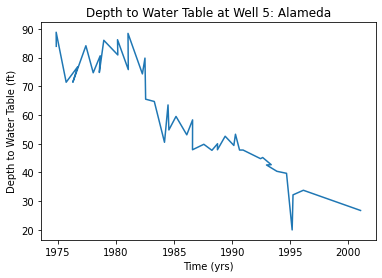

In [22]:
WellSite5.reset_index(drop=True, inplace=True)
plt.plot(WellSite5["year"],WellSite5["GSE_GWE"])
plt.title("Depth to Water Table at Well 5: Alameda")
plt.xlabel("Time (yrs)")
plt.ylabel("Depth to Water Table (ft)")
plt.show()

In [23]:
WellSite5['change_rate'] = np.zeros(len(WellSite5))

for i in range(0,len(WellSite5)-1):
    GSE_GWE_difference = WellSite5['GSE_GWE'][i+1] - WellSite5['GSE_GWE'][i]
    time_difference = WellSite5['year'][i+1] - WellSite5['year'][i]
    WellSite5.at[i,'change_rate'] = GSE_GWE_difference/time_difference
WellSite5.head()

avgChange = np.mean(WellSite5['change_rate'])
print("The average change rate of the depth to water table is ", avgChange, "ft/year")

The average change rate of the depth to water table is  11.694693284352036 ft/year


LinregressResult(slope=-2.5108141235716905, intercept=5045.148739943973, rvalue=-0.927093451289365, pvalue=1.659828483878621e-19, stderr=0.1566394184569428)


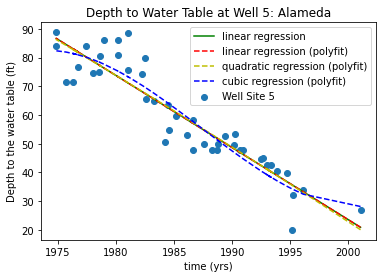

In [24]:
#first the NaN values have to be removed
Y = WellSite5['GSE_GWE']
X = WellSite5['year']
finiteYmask = np.isfinite(Y)
Yclean = Y[finiteYmask]
Xclean = X[finiteYmask]


values = stats.linregress(Xclean,Yclean)
print(values)

linear = np.polyfit(Xclean, Yclean, deg = 1)
quadratic = np.polyfit(Xclean, Yclean, deg = 2)
cubic = np.polyfit(Xclean, Yclean, deg = 3)

plt.scatter(WellSite5['year'],WellSite5['GSE_GWE'], label='Well Site 5')

plt.ylabel('Depth to the water table (ft)')
plt.xlabel('time (yrs)')
plt.title("Depth to Water Table at Well 5: Alameda")
plt.plot(WellSite5['year'],values[0] * WellSite5['year'] + values[1],
         'g', label = "linear regression")
plt.plot(WellSite5['year'],linear[0] * WellSite5['year'] + linear[1],
         'r--', label = "linear regression (polyfit)")
plt.plot(WellSite5['year'],quadratic[0] * WellSite5['year']**2 + quadratic[1] * WellSite5['year'] + quadratic[2],
         'y--', label = "quadratic regression (polyfit)")
plt.plot(WellSite5['year'],cubic[0] * WellSite5['year']**3 + cubic[1] * WellSite5['year']**2 + cubic[2] * WellSite5['year'] + cubic[3],
         'b--', label = "cubic regression (polyfit)")
plt.legend()
plt.show()

Well 5 does not include values for before 1975. This makes the rest of the data fall more in line with a linear regression. Meaning that Alameda County is restoring its water table. Now, is this the case for the LA region where precipitation is almost non-existent?

In [25]:
LA.head()

,STN_ID,SITE_CODE,SWN,WELL_NAME,LATITUDE,LONGITUDE,GSE,GSE_METHOD,GSE_ACC,BASIN_CODE,BASIN_NAME,COUNTY_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,MONITORING_PROGRAM
0,38286,337461N1182149W001,05S13W11P001S,NaN,33.7461,-118.215,12.71,Unknown,Unknown,4-011.03,West Coast,Los Angeles,NaN,Unknown,Unknown,NaN,VOLUNTARY
1,24462,337461N1182149W002,05S13W11P002S,NaN,33.7461,-118.215,12.71,Unknown,Unknown,4-011.03,West Coast,Los Angeles,NaN,Unknown,Unknown,NaN,VOLUNTARY
2,10155,337686N1180957W001,05S12W01E001S,NaN,33.7686,-118.096,12.62,Unknown,Unknown,4-011.04,Central,Los Angeles,NaN,Unknown,Unknown,NaN,VOLUNTARY
3,30253,337686N1180960W001,05S12W01E002S,NaN,33.7686,-118.096,12.52,Unknown,Unknown,4-011.04,Central,Los Angeles,NaN,Unknown,Unknown,NaN,VOLUNTARY
4,24460,337709N1182205W001,05S13W02E001S,NaN,33.7709,-118.221,7.66,Unknown,Unknown,4-011.03,West Coast,Los Angeles,NaN,Unknown,Unknown,NaN,VOLUNTARY


In [26]:
##find the measurements at each site

#declare a df that contains the oldest measurements
measurements_older = measurements[(measurements['MSMT_DATE'] < '1908-02-01') & (measurements['MSMT_DATE'] > '1900-01-01')]
measurements_older.reset_index(drop=True, inplace=True)

#sample the data to make it easier for iteration
index_older = np.unique(measurements_older["SITE_CODE"],return_index = True)[1]
measurements_older = measurements_older.iloc[index_older]

#find the sites where the sitecodes match and store them
measurements_older.reset_index(drop=True, inplace=True)
SiteCodes = [0] * len(LA)
for i in range(0,len(measurements_older)):
    for j in range(0,len(LA)):
        if (measurements_older['SITE_CODE'][i] == LA['SITE_CODE'][j]):
            SiteCodes[j] = (measurements_older['SITE_CODE'][i])
            break

try:
    while True:
        SiteCodes.remove(0)
except ValueError:
    pass
print(SiteCodes)

['346533N1182382W001', '346875N1182921W001', '346889N1182574W001', '346931N1182762W001', '347083N1183212W001', '347211N1183349W001', '347253N1183206W001', '347842N1182295W001', '347844N1182270W001', '347864N1182290W001', '348130N1182985W001', '348133N1182996W001', '348158N1182335W001', '348180N1184085W001', '348200N1182365W001']


In [27]:
WellSite1 = measurements[measurements["SITE_CODE"] == SiteCodes[0]].copy()
WellSite1.reset_index(drop=True, inplace=True)
WellSite2 = measurements[measurements["SITE_CODE"] == SiteCodes[1]].copy()
WellSite2.reset_index(drop=True, inplace=True)
WellSite3 = measurements[measurements["SITE_CODE"] == SiteCodes[2]].copy()
WellSite3.reset_index(drop=True, inplace=True)
WellSite4 = measurements[measurements["SITE_CODE"] == SiteCodes[3]].copy()
WellSite4.reset_index(drop=True, inplace=True)
WellSite5 = measurements[measurements["SITE_CODE"] == SiteCodes[4]].copy()
WellSite5.reset_index(drop=True, inplace=True)
WellSite6 = measurements[measurements["SITE_CODE"] == SiteCodes[5]].copy()
WellSite6.reset_index(drop=True, inplace=True)
WellSite7 = measurements[measurements["SITE_CODE"] == SiteCodes[6]].copy()
WellSite7.reset_index(drop=True, inplace=True)
WellSite8 = measurements[measurements["SITE_CODE"] == SiteCodes[7]].copy()
WellSite8.reset_index(drop=True, inplace=True)
WellSite9 = measurements[measurements["SITE_CODE"] == SiteCodes[8]].copy()
WellSite9.reset_index(drop=True, inplace=True)
WellSite10 = measurements[measurements["SITE_CODE"] == SiteCodes[9]].copy()
WellSite10.reset_index(drop=True, inplace=True)
WellSite11 = measurements[measurements["SITE_CODE"] == SiteCodes[10]].copy()
WellSite11.reset_index(drop=True, inplace=True)
WellSite12 = measurements[measurements["SITE_CODE"] == SiteCodes[11]].copy()
WellSite12.reset_index(drop=True, inplace=True)
WellSite13 = measurements[measurements["SITE_CODE"] == SiteCodes[12]].copy()
WellSite13.reset_index(drop=True, inplace=True)
WellSite14 = measurements[measurements["SITE_CODE"] == SiteCodes[13]].copy()
WellSite14.reset_index(drop=True, inplace=True)
WellSite15 = measurements[measurements["SITE_CODE"] == SiteCodes[14]].copy()
WellSite15.reset_index(drop=True, inplace=True)

In [28]:
print(np.size(WellSite1))
print(np.size(WellSite2))
print(np.size(WellSite3))
print(np.size(WellSite4))
print(np.size(WellSite5))
print(np.size(WellSite6))
print(np.size(WellSite7))
print(np.size(WellSite8))
print(np.size(WellSite9))
print(np.size(WellSite10))
print(np.size(WellSite11))
print(np.size(WellSite12))
print(np.size(WellSite13))

210
14
14
14
14
14
14
14
14
14
14
14
42


For LA county, well 1 has the most data. Therefore, this well will be used for analysis.

In [29]:
#create a new column for datetime for plotting
WellSite1['datetime'] = np.zeros(len(WellSite1))
WellSite1['year'] = np.zeros(len(WellSite1))
for i in range(0,len(WellSite1)):
    WellSite1.at[i,'datetime'] = datetime.strptime(WellSite1['MSMT_DATE'][i], '%Y-%m-%d %H:%M:%S')
    WellSite1.at[i,'year'] = WellSite1["datetime"][i].year + (WellSite1["datetime"][i].month)/12 + (WellSite1["datetime"][i].day)/30.5
    
WellSite1

,SITE_CODE,WLM_ID,MSMT_DATE,WLM_RPE,WLM_GSE,GWE,GSE_GWE,WLM_QA_DESC,WLM_DESC,WLM_ACC_DESC,WLM_ORG_NAME,COOP_ORG_NAME,MONITORING_PROGRAM,MSMT_CMT,datetime,year
0,346533N1182382W001,1454456,1963-08-02 00:00:00,2460.83,2460.83,NaN,NaN,Dry well,NaN,NaN,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1963-08-02 00:00:00,1963.732240
1,346533N1182382W001,1454455,1942-04-21 00:00:00,2460.83,2460.83,2293.43,167.40,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1942-04-21 00:00:00,1943.021858
2,346533N1182382W001,1454454,1941-12-02 00:00:00,2460.83,2460.83,2296.03,164.80,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1941-12-02 00:00:00,1942.065574
3,346533N1182382W001,1454453,1941-04-10 00:00:00,2460.83,2460.83,2305.73,155.10,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1941-04-10 00:00:00,1941.661202
4,346533N1182382W001,1454452,1940-11-26 00:00:00,2460.83,2460.83,2295.98,164.85,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1940-11-26 00:00:00,1941.769126
5,346533N1182382W001,1454451,1940-03-13 00:00:00,2460.83,2460.83,2309.03,151.80,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1940-03-13 00:00:00,1940.676230
6,346533N1182382W001,1454450,1939-11-17 00:00:00,2460.83,2460.83,2299.98,160.85,Nearby pump operating,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1939-11-17 00:00:00,1940.474044
7,346533N1182382W001,1454449,1937-11-22 00:00:00,2460.83,2460.83,2311.53,149.30,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1937-11-22 00:00:00,1938.637978
8,346533N1182382W001,1454448,1937-11-09 00:00:00,2460.83,2460.83,2304.73,156.10,Pumping,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1937-11-09 00:00:00,1938.211749
9,346533N1182382W001,1454447,1937-04-22 00:00:00,2460.83,2460.83,2311.53,149.30,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1937-04-22 00:00:00,1938.054645


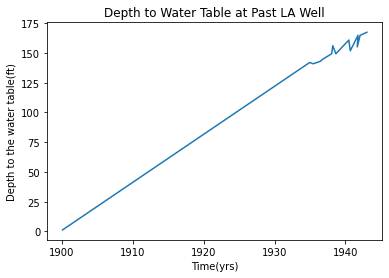

In [30]:
#only 1 well had significant data at this age range
plt.plot(WellSite1["year"],WellSite1["GSE_GWE"])
plt.title("Depth to Water Table at Past LA Well")
plt.ylabel('Depth to the water table(ft)')
plt.xlabel('Time(yrs)')
plt.show()

LinregressResult(slope=3.851547168306387, intercept=-7315.5427230592, rvalue=0.9955208576999279, pvalue=1.1547528879132838e-13, stderr=0.10558927306658425)


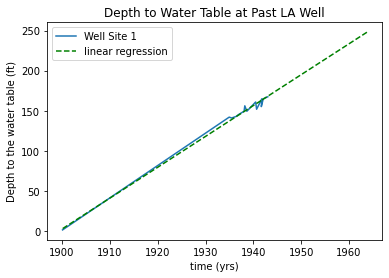

In [31]:
#first the NaN values have to be removed
Y = WellSite1['GSE_GWE']
X = WellSite1['year']
finiteYmask = np.isfinite(Y)
Yclean = Y[finiteYmask]
Xclean = X[finiteYmask]


values = stats.linregress(Xclean,Yclean)
print(values)

plt.plot(WellSite1['year'],WellSite1['GSE_GWE'], label='Well Site 1')

plt.ylabel('Depth to the water table (ft)')
plt.xlabel('time (yrs)')
plt.title("Depth to Water Table at Past LA Well")
plt.plot(WellSite1['year'],values[0] * WellSite1['year'] + values[1],
         'g--', label = "linear regression")
plt.legend()
plt.show()

For very old dates the data is very limited so data analysis is not as reliable. However, from this linear regression, in comparison with Alameda, the depth to the water table increases in LA at a rate of 3.85ft/year! To find more modern LA data, the original dataset has to be iterated through again using a sample.

In [32]:
##find the measurements at each site

#declare a df that contains the oldest measurements
measurements_older = measurements[(measurements['MSMT_DATE'] < '1961-01-03') & (measurements['MSMT_DATE'] > '1961-01-01')]
measurements_older.reset_index(drop=True, inplace=True)

#sample the data to make it easier for iteration
index_older = np.unique(measurements_older["SITE_CODE"],return_index = True)[1]
measurements_older = measurements_older.iloc[index_older]

#find the sites where the sitecodes match and store them
measurements_older.reset_index(drop=True, inplace=True)
SiteCodes = [0] * len(LA)
for i in range(0,len(measurements_older)):
    for j in range(0,len(LA)):
        if (measurements_older['SITE_CODE'][i] == LA['SITE_CODE'][j]):
            SiteCodes[j] = (measurements_older['SITE_CODE'][i])
            break

try:
    while True:
        SiteCodes.remove(0)
except ValueError:
    pass
print(SiteCodes)

['340931N1179615W001', '341864N1183612W001', '342215N1185216W001', '345358N1179754W001', '345475N1179182W001', '346680N1182232W001', '348053N1182996W001']


In [33]:
WellSite1 = measurements[measurements["SITE_CODE"] == SiteCodes[0]].copy()
WellSite1.reset_index(drop=True, inplace=True)
WellSite2 = measurements[measurements["SITE_CODE"] == SiteCodes[1]].copy()
WellSite2.reset_index(drop=True, inplace=True)
WellSite3 = measurements[measurements["SITE_CODE"] == SiteCodes[2]].copy()
WellSite3.reset_index(drop=True, inplace=True)
WellSite4 = measurements[measurements["SITE_CODE"] == SiteCodes[3]].copy()
WellSite4.reset_index(drop=True, inplace=True)
WellSite5 = measurements[measurements["SITE_CODE"] == SiteCodes[4]].copy()
WellSite5.reset_index(drop=True, inplace=True)
WellSite6 = measurements[measurements["SITE_CODE"] == SiteCodes[5]].copy()
WellSite6.reset_index(drop=True, inplace=True)
WellSite7 = measurements[measurements["SITE_CODE"] == SiteCodes[6]].copy()
WellSite7.reset_index(drop=True, inplace=True)

In [34]:
print(np.size(WellSite1))
print(np.size(WellSite2))
print(np.size(WellSite3))
print(np.size(WellSite4))
print(np.size(WellSite5))
print(np.size(WellSite6))
print(np.size(WellSite7))

111678
7168
5488
2492
392
14
574


In [35]:
#create a new column for datetime for plotting
WellSite1['datetime'] = np.zeros(len(WellSite1))
WellSite1['year'] = np.zeros(len(WellSite1))
for i in range(0,len(WellSite1)):
    WellSite1.at[i,'datetime'] = datetime.strptime(WellSite1['MSMT_DATE'][i], '%Y-%m-%d %H:%M:%S')
    WellSite1.at[i,'year'] = WellSite1["datetime"][i].year + (WellSite1["datetime"][i].month)/12 + (WellSite1["datetime"][i].day)/30.5
    
WellSite1

,SITE_CODE,WLM_ID,MSMT_DATE,WLM_RPE,WLM_GSE,GWE,GSE_GWE,WLM_QA_DESC,WLM_DESC,WLM_ACC_DESC,WLM_ORG_NAME,COOP_ORG_NAME,MONITORING_PROGRAM,MSMT_CMT,datetime,year
0,340931N1179615W001,2851727,2021-01-08 00:00:00,388.93,387.0,200.18,186.82,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Main San Gabriel Basin Watermaster,Main San Gabriel Basin Watermaster,CASGEM,NaN,2021-01-08 00:00:00,2021.345628
1,340931N1179615W001,2672882,2020-07-10 00:00:00,388.93,387.0,203.95,183.05,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Main San Gabriel Basin Watermaster,Main San Gabriel Basin Watermaster,CASGEM,NaN,2020-07-10 00:00:00,2020.911202
2,340931N1179615W001,2619764,2020-01-10 00:00:00,388.93,387.0,212.71,174.29,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Main San Gabriel Basin Watermaster,Main San Gabriel Basin Watermaster,CASGEM,NaN,2020-01-10 00:00:00,2020.411202
3,340931N1179615W001,2482550,2019-07-19 00:00:00,388.93,387.0,196.32,190.68,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Main San Gabriel Basin Watermaster,Main San Gabriel Basin Watermaster,CASGEM,NaN,2019-07-19 00:00:00,2020.206284
4,340931N1179615W001,2456049,2019-01-04 00:00:00,388.93,387.0,176.54,210.46,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Main San Gabriel Basin Watermaster,Main San Gabriel Basin Watermaster,CASGEM,NaN,2019-01-04 00:00:00,2019.214481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7972,340931N1179615W001,2712357,1932-07-01 00:00:00,388.93,387.0,277.99,109.01,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1932-07-01 00:00:00,1932.616120
7973,340931N1179615W001,2712356,1932-06-30 00:00:00,388.93,387.0,278.06,108.94,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1932-06-30 00:00:00,1933.483607
7974,340931N1179615W001,2712355,1932-06-28 00:00:00,388.93,387.0,278.19,108.81,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1932-06-28 00:00:00,1933.418033
7975,340931N1179615W001,2712354,1932-06-21 00:00:00,388.93,387.0,278.43,108.57,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,United States Geological Survey,VOLUNTARY,NaN,1932-06-21 00:00:00,1933.188525


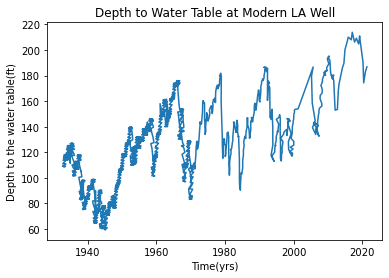

In [36]:
#plot the well with the most available data
plt.plot(WellSite1["year"],WellSite1["GSE_GWE"])
plt.title("Depth to Water Table at Modern LA Well")
plt.ylabel('Depth to the water table(ft)')
plt.xlabel('Time(yrs)')
plt.show()

LinregressResult(slope=1.2128583249530904, intercept=-2255.8284267031327, rvalue=0.5953599535139232, pvalue=0.0, stderr=0.0183285826795633)


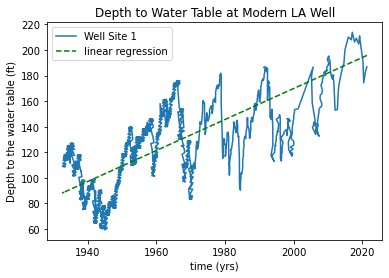

In [37]:
#first the NaN values have to be removed
Y = WellSite1['GSE_GWE']
X = WellSite1['year']
finiteYmask = np.isfinite(Y)
Yclean = Y[finiteYmask]
Xclean = X[finiteYmask]


values = stats.linregress(Xclean,Yclean)
print(values)

plt.plot(WellSite1['year'],WellSite1['GSE_GWE'], label='Well Site 1')

plt.ylabel('Depth to the water table (ft)')
plt.xlabel('time (yrs)')
plt.title("Depth to Water Table at Modern LA Well")
plt.plot(WellSite1['year'],values[0] * WellSite1['year'] + values[1],
         'g--', label = "linear regression")
plt.legend()
plt.show()

This time the data is more sinusoidal. However, it still follows a linear trend. From 1940 to the present, LA's depth to the water table is still increasing. Today, LA residents will have to dig up to 180ft to even reach groundwater! Compare that with Alameda which only requires 30ft today. Also, the rate at which groundwater is taken up is lower today at 1.2ft/year. Another noticable statistic is the r^2 value. The linear regression for LA had a large standard deviation compared to the regression for Alameda. This means that the water table in LA is more susceptible to weather. La Niña and El Niño periods are most likely the reason. Regardless of the weather though, LA is in much deeper trouble than the bay area. 

## In Conclusion

By examining the data sets of stations and their respective measurements across California, insights can be made on the future outlook of the grounwater supply of California. Before any analysis methods can be used, the data had to be filtered based on date. After doing so, histograms are plotted to view the general levels of water at two different time ranges. More specifically, they provide information on the amounts of wells at different water table depths. It was found that currently, there are more stations that have a shallow water table. Furthermore, the spread of depths for the rest of the distribution remain relativly consistent between the past and modern datasets. This brings into question on why more wells are being made that have shallow depths. To answer this question, the data has to be filtered based on location to see if there is any correlation.

To do so, the data is sampled and bootstrapped. Once a small enough dataset is created, the data can then go through an iteration to match up logitudes and latitudes with their respective site codes. This allows for cartopy functions to map the data based on location. The resulting cartopy plots show that in the past, most groundwater stations were located in the central valley and in SoCal. Today, there are more stations/wells available in NorCal. Furthermore, as time progresses, the depth to the water table appear to increase in both SoCal and the central valley. This means that these regions have used up more groundwater than it can naturally restore. This fact can be further examined by plotting individual wells.

One region that is examined further is Alameda county. The county has minimal data for old measurments, but does include a pair of wells that date back to the 1960s. These wells show that at first, the rate of extraction of groundwater was greater than it could be restored. However, beginning in the 1970s, the trend reversed, and now groundwater is almost completly restored. The wells in the LA county, however, tell a different story. Those wells have been increasing in depth, and water is becoming more scarce. Although today, the rate of removal is not as large, that doesn't prevent many wells from drying up and being abandoned. This is likely the cause for the increase in the amount of wells in NorCal. Water from up north is transferable to SoCal. It appears that this does not impact the water supply in the immediate Bay Area wells but the Central Valley is still suffering. The water table does extend up to 9000ft in certain parts of California. So theoretically, there is still much time with the current rate of withdraws. However, digging new wells and making them deeper is very costly. More data will be needed to investigate the cost/benefit of new wells further. 

## References

California, S. of. (n.d.). Groundwater. Department of Water Resources. Retrieved December 12, 2021, from https://water.ca.gov/water-basics/groundwater. 

Groundwater: What is groundwater? completed. Groundwater: What is Groundwater? | U.S. Geological Survey. (n.d.). Retrieved December 12, 2021, from https://www.usgs.gov/special-topics/water-science-school/science/groundwater-what-groundwater. 

[1] Periodic groundwater level measurements. California Open Data. (2021, December 12). Retrieved December 12, 2021, from https://data.ca.gov/dataset/periodic-groundwater-level-measurements. 